事先说明，以下绘图数据皆为虚拟数据

In [1]:
import matplotlib.pyplot as plt
from matplotlib.font_manager import FontProperties
import matplotlib as mpl

# 设置字体路径
# linux 下
# font_path = "/usr/share/fonts/google-noto-cjk/NotoSansCJK-Medium.ttc"
# font_prop = FontProperties(fname=font_path)
# # 将字体设置应用到matplotlib的配置参数中
# mpl.rcParams['font.family'] = 'sans-serif'
# mpl.rcParams['font.sans-serif'] = [font_prop.get_name()]

# windows 下
font_path = "C:\\Windows\\Fonts\\msyh.ttc"
font_prop = FontProperties(fname=font_path)
plt.rcParams['font.family'] = 'sans-serif'
plt.rcParams['font.sans-serif'] = [font_prop.get_name()]

# 引言

近年来国家气象部门大力发展遥感观测系统，诸如这几年建设的地基垂直观测系统包含：风廓线雷达、微波辐射计、云雷达、激光雷达、GNSS/MET 观测设备，这些设备实现了对高空大气 24 小时不间断的自动观测，解决了高空大气探测数据少的问题。
上一章节我们学习风廓线雷达探测原理和数据格式，绘制了风羽图；

本次我们一起学习微波辐射计的采集原理，并利用 metpy 绘制 TlogP 图。

在学习完新设备的原理、数据处理和绘图后，我们再以 闪电定位观测数据为例，一起学习如何处理大量数据。

#  案例 1：利用微波辐射计数据绘制 TLogP 图，并叠加风廓线雷达

微波辐射计（ microwave radiometer，缩写为 “MWR”）也称为 “微波辐射仪”，是一种用于测量亚毫米级到厘米级波长（频率约为 1-1000GHz）的电磁波（微波）的辐射计。微波辐射仪能接收大气中的某些成分在一定频率上强烈辐射的微波，经过一定的转换方法，得到大气在垂直和水平方向上的气象要素分布。此仪器携带方便，可增加探空网在时间和空间上的密度，能观测到大气的连续变化，不致漏掉范围较小但变化剧烈的天气系统。

最早的微波辐射计是由美国物理学家罗伯特・亨利・迪克于 1946 年发明的，我国微波辐射计的研究工作始于 70 年代初，已经历了从地基到空载，从单频到多频的发展进程，并取得一系列有价值的成果。
下图为暴雨所微波辐射计安装现场图 ，图片来源于 湖北气象官网

![国内微波辐射计](https://cdn.kesci.com/upload/image/rl0n6yavao.jpg?imageView2/0/w/960/h/960)


## 探测原理

地基微波辐射计是基于物质热辐射理论进行大气探测，它接收特定频段的辐射，经过数值化处理得到有效的信息，这些频段的辐射电压值就是 L0 级数据；
对辐射电压值进行按照普朗克辐射定律进行数学处理，得到 L1 级数据 —— 亮温；
再通过人工神经网络算法对 L1 级的亮温数据进行反演，得到 L2 级数据 —— 高空大气 的：气温、湿度、水汽密度、液态水含量等数据。

探测数据采集处理流程如下：
微波多通道观测→L0 级数据（电压值）→L1 级数据（亮温）→L2 级数据（大气廓线）

日常业务数据处理中很少使用到 L0、L1 级数据，一般使用 L2 级大气廓线数据。

## 大气廓线数据格式

微波辐射计 L2 级大气廓线数据采取 txt 文本 和 bin 二进制两种方式存储，一般业务使用 txt 文本数据格式，该格式比较简单，具体如下：

> MWR,01.00
57494,114.0600,30.6000,+23.6,TQ9527,lt
Record,DateTime,10,SurTem (℃),SurHum (%),SurPre (hPa),Tir (℃),Rain,CloudBase (km),Vint (mm),Lqint (mm),0.000 (km),0.025 (km),0.050 (km),0.075 (km),0.100 (km),0.125 (km),0.150 (km),0.175 (km),0.200 (km),0.225 (km),0.250 (km),0.275 (km),0.300 (km),0.325 (km),0.350 (km),0.375 (km),0.400 (km),0.425 (km),0.450 (km),0.475 (km),0.500 (km),0.550 (km),0.600 (km),0.650 (km),0.700 (km),0.750 (km),0.800 (km),0.850 (km),0.900 (km),0.950 (km),1.000 (km),1.050 (km),1.100 (km),1.150 (km),1.200 (km),1.250 (km),1.300 (km),1.350 (km),1.400 (km),1.450 (km),1.500 (km),1.550 (km),1.600 (km),1.650 (km),1.700 (km),1.750 (km),1.800 (km),1.850 (km),1.900 (km),1.950 (km),2.000 (km),2.250 (km),2.500 (km),2.750 (km),3.000 (km),3.250 (km),3.500 (km),3.750 (km),4.000 (km),4.250 (km),4.500 (km),4.750 (km),5.000 (km),5.250 (km),5.500 (km),5.750 (km),6.000 (km),6.250 (km),6.500 (km),6.750 (km),7.000 (km),7.250 (km),7.500 (km),7.750 (km),8.000 (km),8.250 (km),8.500 (km),8.750 (km),9.000 (km),9.250 (km),9.500 (km),9.750 (km),10.000 (km),QCflag
1,2022-10-29 00:00:00,11,13.60,100.00,995.20,13.62,1,0.00,45.15,3.28,13.59,10.62,9.95,10.87,9.43,9.08,8.85,7.13,7.48,9.84,8.23,9.77,10.54,9.52,9.19,8.56,10.75,10.23,11.28,9.91,11.15,10.52,11.74,12.13,12.68,12.31,13.99,16.06,14.42,15.3,16.8,15.74,15.22,17.07,18.16,17.46,16.56,18.54,18.13,19.28,20.81,19.5,19.99,21.35,21.46,21.64,20.94,21.24,20.66,19.85,20.16,20.67,17.29,15.0,13.13,13.23,12.14,10.1,7.87,8.72,5.42,4.88,4.65,3.01,0.04,-0.79,-2.82,-4.5,-7.83,-9.0,-9.14,-9.59,-11.9,-13.43,-14.96,-17.23,-17.89,-20.09,-24.16,-27.42,-31.12,-32.7,-36.28,2
2,2022-10-29 00:00:00,12,13.60,100.00,995.20,13.62,1,0.00,45.15,3.28,11.08,16.48,16.9,17.4,18.59,18.28,19.49,19.34,19.38,19.29,19.1,19.06,20.31,19.87,20.57,19.65,20.04,20.74,20.12,21.26,20.27,20.91,20.79,19.87,20.64,20.27,21.01,20.49,19.16,20.18,19.88,19.67,19.62,20.02,19.46,19.67,19.34,19.32,18.41,18.38,18.57,19.05,17.95,17.51,16.81,17.18,16.4,16.88,16.56,15.36,15.43,13.75,10.48,7.21,5.02,3.43,2.13,0.86,0.79,0.71,0.31,0.11,0.0,0.0,0.0,0.17,0.27,0.23,0.25,0.25,0.49,0.37,0.39,0.5,0.48,0.45,0.4,0.38,0.35,0.33,0.28,0.25,0.22,2
3,2022-10-29 00:00:00,13,13.60,100.00,995.20,13.62,1,0.00,45.15,3.28,100.0,95.0,95.0,95.0,95.0,95.0,95.0,95.0,95.0,95.0,95.0,95.0,95.0,95.0,95.0,95.0,95.0,95.0,95.0,95.0,95.0,95.0,95.0,95.0,95.0,95.0,95.0,95.0,95.0,95.0,95.0,95.0,95.0,95.0,95.0,95.0,95.0,95.0,95.0,95.0,95.0,95.0,95.0,95.0,95.0,95.0,95.0,95.0,95.0,95.0,95.0,95.0,95.0,95.14,86.19,73.01,58.48,51.71,43.62,42.52,43.77,40.18,38.84,36.93,35.78,40.7,34.08,30.75,35.0,30.86,29.9,31.54,32.07,36.88,32.42,29.41,39.57,42.06,40.46,41.22,35.79,45.41,53.18,2
4,2022-10-29 00:00:00,14,13.60,100.00,995.20,13.62,1,0.00,45.15,3.28,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,2022-10-29 00:02:00,11,13.60,100.00,995.20,13.75,1,0.00,44.78,3.36,13.59,12.18,11.63,12.73,11.63,11.65,11.59,10.08,10.45,12.63,11.08,12.49,12.89,11.91,11.74,10.99,12.86,12.33,13.01,11.57,12.67,11.89,12.74,12.84,13.2,12.68,13.87,15.28,13.72,14.37,15.59,14.39,13.92,15.33,15.86,15.38,14.31,15.96,15.7,16.57,18.06,16.64,17.16,18.21,18.36,18.57,18.01,18.19,17.76,16.88,17.5,18.18,15.46,13.82,12.29,12.73,11.82,10.04,8.13,8.99,5.77,4.9,4.65,2.99,0.03,-0.97,-3.05,-4.81,-7.83,-9.25,-9.77,-10.33,-12.94,-14.71,-16.25,-18.63,-19.41,-21.5,-25.59,-28.68,-32.04,-33.66,-36.89,2

第一行为标识字符串 ，**MWR 表示为 微波辐射计数据** , 01.00 表示为数据版本号为 1.0
第二行为站点元数据信息，使用 `,` 分隔 ，该行数据以此为：

|  序号 | 名称  | 说明  |
| ------------ | ------------ | ------------ |
|  1 |  站号 |  ------  |
|  2 |   站点经度 | ------  |
|  3 |   站点纬度 | ------  |
|  4 |   站点拔海高度 | ------  |
|  5 |   探测仪器型号 | ------  |
|  6 |   型号标识 | ------  |

从第三行起到结尾，内容类似 CSV 格式 ，可跳过首两行后，使用 pandas.read_csv 读取，各列意义如下：

|  序号 | 列名  | 内容说明  |
| ------------ | ------------ | ------------ |
|  1 |  Record |  记录序号  |
|  2 |   DateTime | 数据观测时间  |
|  3 |   10 | 廓线数据类型  |
|  4 |  SurTem (℃) | 环境温度（单位为℃）  |
|  5 |   SurHum (%)  | 环境相对湿度（单位为 %）  |
|  6 |  SurPre (hPa) | 大气压力（单位为 hPa）  |
|  7 |  Tir (℃)  |   红外温度（单位为℃）     |
|  8 |     Rain  |  是否降水（1＝是，0＝否）    |
|  9 |  CloudBase (km)  | 云底高度（单位为 km）|
|  10 |     Vint (mm)   |  积分水汽（单位为 cm） |
|  11 |    Lqint (mm)    | 积分云液水（单位为 mm） |
| 12... |        Hn (km))    |   第 n 层结数据，每层一列，不同设备层结数量不同 |

其中 `10` 列 表示 L2 级 气象产品数据组廓线数据的不同类型，具体意义如下：

|  类型码  |   廓线数据类型  |   层结数据单位   |
| ------------ | ------------ | ------------ |
|  11  |   温度廓线 TEM   |  ℃    |
|  12   |  水汽密度廓线 WVDen   | $g/m^{3}$   |
|  13   |  相对湿度廓线  RHU  | %      |
|  14   |  液态水廓线 WDen  | $g/m^{3}$   |


## 与气球探空相比

微波辐射计的观测频率为 **2 分钟一次**，每次观测可以得到 **4 种廓线产品**，一天共有 **2880 条数据**。

而每日探空站只能观测两次，从观测时间频率上 微波辐射计有着较好的观测密度，能更好地监测灾害性天气的发生与发展。

但微波辐射计数据是遥感反演高空数据，使用 人工神经网络算法建立了 亮温 到 大气廓线的映射关系，在反演中存在着误差。

目前在实际业务中还是以气象探空为主要高空气象数据来源，微波辐射计等垂直观测系统通过数据融合方式对起到对高空数据补充。

（世界气象组织定期组织各成员国对气球探空仪器进行对比实验，2010 年以后我国探空仪器设备研发逐渐追上国际脚步，数据质量逐年提高，特别是在 2018 年气象仪器设备厂商整合后，数据质量已经与国际水平不相上下。）

## 数据读取示例

In [2]:
import sys
import os
sys.path.append(os.path.abspath('../'))
import json
from datetime import datetime,timedelta
import dateutil.parser
import dateutil.rrule
import numpy as np
import pandas as pd
import xarray as xr
from metgrs import Utils
import io
import math
import types
import glob
import matplotlib as mpl
from joblib import Parallel,delayed
from metgrs import MicroWaveRadiometer,WindProfileRadar
import matplotlib.pyplot as plt

In [3]:
datapath='../datas/'

In [4]:
fs=sorted(glob.glob(datapath+'/MWRFiles/20241204/*'))

In [6]:
df=MicroWaveRadiometer.readMWRFile(fs[0])

## TLogP 图

又名 SkewT-LogP 图，是一个非常有用的气象热力学图，在该图上绘制了某个站点高空大气的不同温度、湿度、气压等气象要素，图的横坐标为 气象要素的分布，纵坐标为 气压的对数。


![TLogP](https://cdn.kesci.com/upload/image/rl0ruy1fx6.png?imageView2/0/w/960/h/960)

TLogP 图上常常会绘制三条曲线：

- 温度层结曲线 ，又称为大气温度廓线，表明真实大气不同高度的气温。

- 露点层结曲线，又称为大气露点廓线，表明真实大气不同高度的露点温度。

- 状态曲线，这是一个虚拟的曲线，用于模拟地面气块沿着干绝热上升达到饱和后，再沿着湿绝热上升的气块温度。

三条曲线结合相关气象指标，在气象灾害预报中有着重要的作用。

- 是暴雨、冰雹等强对流天气预测的重要指标；

- 是云高度和厚度的重要识别方法

- 是边界层污染能否扩散的重要指示

具体如何识别利用 TLogP 图 ，可以参考 [气象家园 TLogP 课件](http://bbs.06climate.com/forum.php?mod=viewthread&tid=28868&extra=&page=1 "气象家园 TLogP 课件")

## 微波辐射计数据绘制 TLogP 图

metpy 库基于 matplotlib 库提供了 TlogP 图绘制的接口 skew ，可以很方便地将高空数据绘制成 TLogP 图。

该接口需要使用 气压作为 参数传入，微波辐射计采集的高空气象数据只有高度数据和地面气压数据，没有高空气压数据。

可以参照气压高度递减率的方法 ，使用 metpy.calc.add_height_to_pressure 方法计算不同层的气压。



In [8]:
# 拆分微波辐射计数据，分为地面和高空两组数据
sur_data = df[['DateTime', 'SurTem(℃)', 'SurHum(%)', 'SurPre(hPa)',
               'Tir(℃)', 'Rain', 'CloudBase(km)', 'Vint(mm)', 'Lqint(mm)']]
high_data = df.drop(['Record',  'SurTem(℃)', 'SurHum(%)', 'SurPre(hPa)',
                     'Tir(℃)', 'Rain', 'CloudBase(km)', 'Vint(mm)', 'Lqint(mm)', 'QCflag'], axis=1)

In [9]:
import metpy.calc as mpcalc
from metpy.units import units
# 丢弃重复值
sur_data = sur_data.drop_duplicates().reset_index(drop=True)
# 计算地面露点温度
sur_data['SurDwp'] = mpcalc.dewpoint_from_relative_humidity(
    sur_data['SurTem(℃)'].values*units.degC,
    sur_data['SurHum(%)'].values * units.percent).m

In [10]:
high_data

,DateTime,dtype,0.000(km),0.025(km),0.050(km),0.075(km),0.100(km),0.125(km),0.150(km),0.175(km),...,7.750(km),8.000(km),8.250(km),8.500(km),8.750(km),9.000(km),9.250(km),9.500(km),9.750(km),10.000(km)
0,2024-12-04 00:00:00,TEM,11.200,11.265,11.062,10.769,10.476,10.226,9.926,9.609,...,-23.822,-25.038,-26.420,-27.998,-29.490,-30.938,-32.446,-34.099,-35.756,-37.437
1,2024-12-04 00:00:00,WVDen,4.699,4.781,4.688,4.617,4.600,4.608,4.575,4.501,...,0.126,0.116,0.103,0.093,0.079,0.068,0.059,0.050,0.045,0.040
2,2024-12-04 00:00:00,RHU,46.000,46.614,46.289,46.437,47.134,47.969,48.543,48.725,...,16.129,16.546,16.592,17.161,16.683,16.381,16.375,16.355,17.156,17.792
3,2024-12-04 00:00:00,WDen,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,...,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001
4,2024-12-04 00:02:00,TEM,11.000,11.170,11.063,10.858,10.636,10.436,10.178,9.903,...,-24.508,-25.713,-27.072,-28.581,-30.022,-31.442,-32.927,-34.536,-36.149,-37.797
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2875,2024-12-04 23:56:00,WDen,0.271,0.179,0.160,0.152,0.140,0.139,0.135,0.135,...,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001,0.001
2876,2024-12-04 23:58:00,TEM,7.800,7.819,7.710,7.565,7.454,7.322,7.169,7.000,...,-26.710,-27.982,-29.281,-30.582,-31.881,-33.197,-34.650,-36.279,-37.950,-39.653
2877,2024-12-04 23:58:00,WVDen,8.225,8.197,8.137,8.042,7.949,7.840,7.712,7.574,...,0.160,0.134,0.108,0.083,0.062,0.054,0.050,0.044,0.039,0.034
2878,2024-12-04 23:58:00,RHU,100.000,99.538,99.510,99.279,98.835,98.326,97.684,96.995,...,26.450,24.764,22.391,19.473,16.424,16.241,17.249,17.794,18.310,19.029


In [11]:
high_data.columns  # 查看列名

Index(['DateTime', 'dtype', '0.000(km)', '0.025(km)', '0.050(km)', '0.075(km)',
       '0.100(km)', '0.125(km)', '0.150(km)', '0.175(km)', '0.200(km)',
       '0.225(km)', '0.250(km)', '0.275(km)', '0.300(km)', '0.325(km)',
       '0.350(km)', '0.375(km)', '0.400(km)', '0.425(km)', '0.450(km)',
       '0.475(km)', '0.500(km)', '0.550(km)', '0.600(km)', '0.650(km)',
       '0.700(km)', '0.750(km)', '0.800(km)', '0.850(km)', '0.900(km)',
       '0.950(km)', '1.000(km)', '1.050(km)', '1.100(km)', '1.150(km)',
       '1.200(km)', '1.250(km)', '1.300(km)', '1.350(km)', '1.400(km)',
       '1.450(km)', '1.500(km)', '1.550(km)', '1.600(km)', '1.650(km)',
       '1.700(km)', '1.750(km)', '1.800(km)', '1.850(km)', '1.900(km)',
       '1.950(km)', '2.000(km)', '2.250(km)', '2.500(km)', '2.750(km)',
       '3.000(km)', '3.250(km)', '3.500(km)', '3.750(km)', '4.000(km)',
       '4.250(km)', '4.500(km)', '4.750(km)', '5.000(km)', '5.250(km)',
       '5.500(km)', '5.750(km)', '6.000(km)', '6.250(km)

In [12]:
# 长表转横，把原先的不同廓线转换为同一行数据。
high_data = high_data.pivot(index='DateTime', columns='dtype', values=high_data.columns[2:])

# 并把高度由 km 转换成 m 单位，形成 _ 分隔的宽表
high_data.columns = [al[1] +'_' +str(int(float(al[0].replace('(km)', '')) * 1000)) for al in high_data.columns]

# 重置索引
high_data = high_data.reset_index()

In [13]:
high_data  # 查看数据情况

,DateTime,RHU_0,TEM_0,WDen_0,WVDen_0,RHU_25,TEM_25,WDen_25,WVDen_25,RHU_50,...,WDen_9500,WVDen_9500,RHU_9750,TEM_9750,WDen_9750,WVDen_9750,RHU_10000,TEM_10000,WDen_10000,WVDen_10000
0,2024-12-04 00:00:00,46.0,11.2,0.001,4.699,46.614,11.265,0.001,4.781,46.289,...,0.001,0.050,17.156,-35.756,0.001,0.045,17.792,-37.437,0.001,0.040
1,2024-12-04 00:02:00,47.5,11.0,0.001,4.792,47.914,11.170,0.001,4.885,47.414,...,0.001,0.049,17.212,-36.149,0.001,0.043,17.741,-37.797,0.001,0.038
2,2024-12-04 00:04:00,48.8,10.9,0.001,4.892,48.879,11.247,0.001,5.008,48.022,...,0.001,0.048,17.917,-36.846,0.001,0.042,18.293,-38.440,0.001,0.037
3,2024-12-04 00:06:00,48.5,10.9,0.001,4.862,48.341,11.344,0.001,4.983,47.325,...,0.001,0.047,18.144,-37.209,0.001,0.041,18.496,-38.772,0.001,0.036
4,2024-12-04 00:08:00,49.2,10.8,0.001,4.901,49.255,11.163,0.001,5.020,48.379,...,0.001,0.047,17.662,-36.840,0.001,0.042,17.969,-38.430,0.001,0.036
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
715,2024-12-04 23:50:00,100.0,7.8,0.156,8.225,99.335,8.020,0.092,8.287,99.177,...,0.001,0.059,27.703,-39.289,0.001,0.051,29.817,-40.888,0.001,0.047
716,2024-12-04 23:52:00,100.0,7.8,0.149,8.225,99.474,8.183,0.091,8.386,99.234,...,0.001,0.054,26.731,-39.618,0.001,0.048,28.872,-41.216,0.001,0.044
717,2024-12-04 23:54:00,100.0,7.8,0.233,8.225,99.651,7.962,0.151,8.282,99.601,...,0.001,0.050,21.231,-38.203,0.001,0.044,22.435,-39.881,0.001,0.039
718,2024-12-04 23:56:00,100.0,7.8,0.271,8.225,99.647,7.769,0.179,8.179,99.678,...,0.001,0.047,18.289,-37.440,0.001,0.041,18.911,-39.170,0.001,0.035


In [14]:
# 宽表转长，这样就可以得到不同时间不同层的温度，为下一步计算和绘图做准备
high_data = pd.wide_to_long(
    high_data,
    stubnames=[
        "RHU",
        "TEM",
        "WDen",
        "WVDen"],
    i="DateTime",
    j="height",
    sep="_").reset_index()
high_data

,DateTime,height,RHU,TEM,WDen,WVDen
0,2024-12-04 00:00:00,0,46.000,11.200,0.001,4.699
1,2024-12-04 00:02:00,0,47.500,11.000,0.001,4.792
2,2024-12-04 00:04:00,0,48.800,10.900,0.001,4.892
3,2024-12-04 00:06:00,0,48.500,10.900,0.001,4.862
4,2024-12-04 00:08:00,0,49.200,10.800,0.001,4.901
...,...,...,...,...,...,...
59755,2024-12-04 23:50:00,10000,29.817,-40.888,0.001,0.047
59756,2024-12-04 23:52:00,10000,28.872,-41.216,0.001,0.044
59757,2024-12-04 23:54:00,10000,22.435,-39.881,0.001,0.039
59758,2024-12-04 23:56:00,10000,18.911,-39.170,0.001,0.035


In [15]:
high_data = pd.merge(
    high_data, sur_data[['DateTime',  'SurTem(℃)', 'SurHum(%)', 'SurDwp', 'SurPre(hPa)']], on='DateTime', how='left')

In [16]:
high_data

,DateTime,height,RHU,TEM,WDen,WVDen,SurTem(℃),SurHum(%),SurDwp,SurPre(hPa)
0,2024-12-04 00:00:00,0,46.000,11.200,0.001,4.699,11.2,46.0,0.006607,993.1
1,2024-12-04 00:02:00,0,47.500,11.000,0.001,4.792,11.0,47.5,0.266147,993.1
2,2024-12-04 00:04:00,0,48.800,10.900,0.001,4.892,10.9,48.8,0.547586,993.1
3,2024-12-04 00:06:00,0,48.500,10.900,0.001,4.862,10.9,48.5,0.462256,993.1
4,2024-12-04 00:08:00,0,49.200,10.800,0.001,4.901,10.8,49.2,0.568525,993.1
...,...,...,...,...,...,...,...,...,...,...
59755,2024-12-04 23:50:00,10000,29.817,-40.888,0.001,0.047,7.8,100.0,7.800000,995.7
59756,2024-12-04 23:52:00,10000,28.872,-41.216,0.001,0.044,7.8,100.0,7.800000,995.7
59757,2024-12-04 23:54:00,10000,22.435,-39.881,0.001,0.039,7.8,100.0,7.800000,995.6
59758,2024-12-04 23:56:00,10000,18.911,-39.170,0.001,0.035,7.8,100.0,7.800000,995.6


In [17]:
# 计算露点温度 和 不同高度的气压
# 使用 metpy.calc.dewpoint_from_relative_humidity(temperature, relative_humidity) 方法计算不同高度的露点温度
# 使用 metpy.calc.add_height_to_pressure(pressure, height) 方法计算地面以上的气压

high_data['DWP'] = mpcalc.dewpoint_from_relative_humidity(
    high_data['TEM'].values*units.degC,
    high_data['RHU'].values * units.percent).m
high_data['PRS_HWC'] = mpcalc.add_height_to_pressure(
    high_data['SurPre(hPa)'].values * units.hPa,
    high_data['height'].values*units.meter).m

In [18]:
high_data

,DateTime,height,RHU,TEM,WDen,WVDen,SurTem(℃),SurHum(%),SurDwp,SurPre(hPa),DWP,PRS_HWC
0,2024-12-04 00:00:00,0,46.000,11.200,0.001,4.699,11.2,46.0,0.006607,993.1,0.006607,993.100000
1,2024-12-04 00:02:00,0,47.500,11.000,0.001,4.792,11.0,47.5,0.266147,993.1,0.266147,993.100000
2,2024-12-04 00:04:00,0,48.800,10.900,0.001,4.892,10.9,48.8,0.547586,993.1,0.547586,993.100000
3,2024-12-04 00:06:00,0,48.500,10.900,0.001,4.862,10.9,48.5,0.462256,993.1,0.462256,993.100000
4,2024-12-04 00:08:00,0,49.200,10.800,0.001,4.901,10.8,49.2,0.568525,993.1,0.568525,993.100000
...,...,...,...,...,...,...,...,...,...,...,...,...
59755,2024-12-04 23:50:00,10000,29.817,-40.888,0.001,0.047,7.8,100.0,7.800000,995.7,-51.811074,258.248511
59756,2024-12-04 23:52:00,10000,28.872,-41.216,0.001,0.044,7.8,100.0,7.800000,995.7,-52.378496,258.248511
59757,2024-12-04 23:54:00,10000,22.435,-39.881,0.001,0.039,7.8,100.0,7.800000,995.6,-53.331291,258.214983
59758,2024-12-04 23:56:00,10000,18.911,-39.170,0.001,0.035,7.8,100.0,7.800000,995.6,-54.146023,258.214983


In [19]:
show_data = high_data[high_data['DateTime'] == datetime(
    2024, 12, 4, 8)].sort_values('height', ascending=True).reset_index(drop=True)
show_data

,DateTime,height,RHU,TEM,WDen,WVDen,SurTem(℃),SurHum(%),SurDwp,SurPre(hPa),DWP,PRS_HWC
0,2024-12-04 08:00:00,0,94.500,7.600,0.014,7.672,7.6,94.5,6.773743,994.0,6.773743,994.000000
1,2024-12-04 08:00:00,25,93.692,7.630,0.005,7.622,7.6,94.5,6.773743,994.0,6.678570,991.044967
2,2024-12-04 08:00:00,50,93.196,7.567,0.004,7.550,7.6,94.5,6.773743,994.0,6.538895,988.097051
3,2024-12-04 08:00:00,75,92.728,7.498,0.003,7.479,7.6,94.5,6.773743,994.0,6.397369,985.156240
4,2024-12-04 08:00:00,100,92.040,7.486,0.003,7.418,7.6,94.5,6.773743,994.0,6.277442,982.222520
...,...,...,...,...,...,...,...,...,...,...,...,...
78,2024-12-04 08:00:00,9000,68.409,-32.053,0.001,0.255,7.6,94.5,6.773743,994.0,-35.925938,299.893577
79,2024-12-04 08:00:00,9250,66.491,-33.599,0.001,0.214,7.6,94.5,6.773743,994.0,-37.696345,288.850031
80,2024-12-04 08:00:00,9500,64.170,-35.170,0.001,0.178,7.6,94.5,6.773743,994.0,-39.550899,278.138121
81,2024-12-04 08:00:00,9750,60.237,-36.728,0.001,0.144,7.6,94.5,6.773743,994.0,-41.645040,267.750172


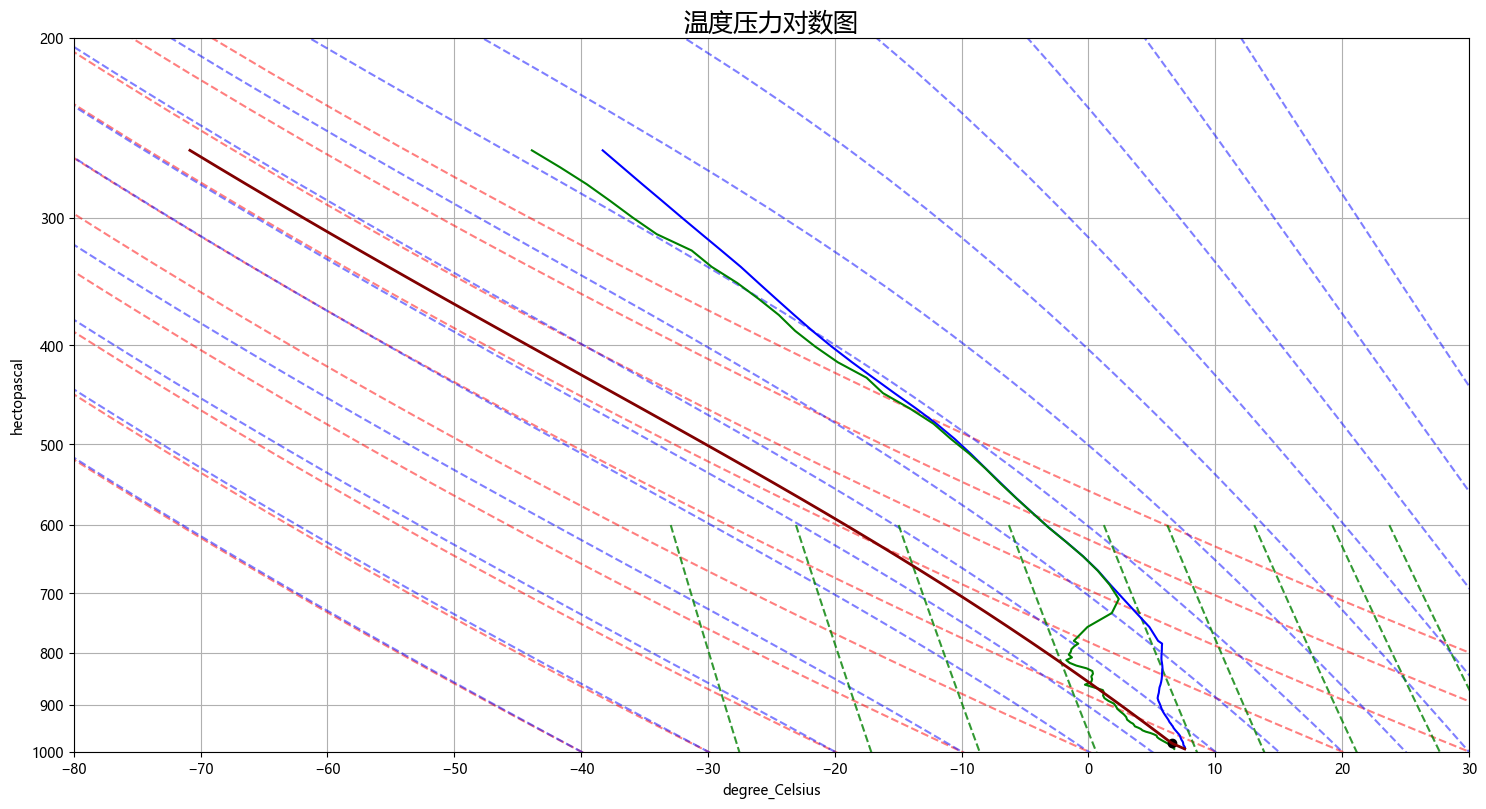

In [20]:
from metpy.plots import SkewT

# 设置绘图参数
fig = plt.figure(figsize=(18, 12))
skew = SkewT(fig, rotation=0)#注意 rotation 表示图像旋转，默认为 30度 ，旋转表示斜温图

skew.plot_dry_adiabats()
skew.plot_moist_adiabats()
skew.plot_mixing_lines()
skew.ax.set_xlim(-80, 30)
skew.ax.set_ylim(1000, 200)
skew.ax.set_title('温度压力对数图', fontsize=18)

# 微波辐射计的数据
p = show_data['PRS_HWC'].values * units.hPa
T = show_data['TEM'].values*units.degC
Td = show_data['DWP'].values*units.degC

# 绘制 温度层结曲线
skew.plot(p, T, 'blue')
# 绘制 露点层结曲线
skew.plot(p, Td, 'green')


# 绘制 LCL 抬升凝结高度
lcl_pressure, lcl_temperature = mpcalc.lcl(p[0], T[0], Td[0])
skew.plot(lcl_pressure, lcl_temperature, 'ko', markerfacecolor='black')

# 计算气块上升的温度数据
prof = mpcalc.parcel_profile(p, T[0], Td[0]).to('degC')
# 绘制状态曲线
skew.plot(p, prof, 'maroon', linewidth=2);

## TLogP 图 叠加风廓线雷达的数据

经过上图绘制，我们发现虽然已经绘制 三条探空数据曲线，但是与 TLogP 介绍的截图相比，还缺少风羽。

虽然微波辐射计无法探测高空的风场，但是上一章节我们学习的 风廓线雷达 可以探测风场数据。

往往我们把微波辐射计和风廓线雷达、及一些相关垂直遥感观测系统统称为 垂直观测系统。这些设备相互之间互相印证补充，起到了  $1+1>2$ 的效果。 

In [21]:
# 由于 风廓线雷达采用 UTC 时间，因此采用00时的数据文件。
fkxdi=WindProfileRadar.readSingleL3file(datapath+'WindProfileRadarFiles/20241204/WIND_ROBS/Z_RADA_I_77777_20241203200000_P_WPRD_LC_ROBS.TXT')

In [22]:
fkx_df=fkxdi.Data

In [23]:
fkx_df['SurPre(hPa)']=show_data['SurPre(hPa)'].values[0]#把地面气压加入，方便后续处理
#计算各高度的气压
fkx_df['PRS_HWC'] = mpcalc.add_height_to_pressure(
    fkx_df['SurPre(hPa)'].values * units.hPa,
    fkx_df['Sampling_Height'].values*units.meter
).m

In [24]:
fkx_df

,Sampling_Height,Wind_Direction,Wind_Speed,Vertical_Wind_Speed,Horizontal_Confidence,Vertical_Confidence,Cn2,U_Wind_Speed,V_Wind_Speed,SurPre(hPa),PRS_HWC
0,150,18.5,3.1,3.7,100,100,7.500000e-20,-0.983644,-2.939803,994.0,976.376301
1,270,11.5,2.9,3.7,100,100,2.400000e-18,-0.578167,-2.841782,994.0,962.460269
2,390,355.0,2.6,3.7,100,100,1.400000e-17,0.226605,-2.590106,994.0,948.705279
3,510,344.0,2.7,3.7,100,100,1.600000e-17,0.744221,-2.595407,994.0,935.109902
4,630,9.0,12.7,3.6,100,100,1.500000e-17,-1.986718,-12.543642,994.0,921.672716
5,750,36.0,23.1,3.7,100,100,1.800000e-17,-13.577839,-18.688293,994.0,908.392311
6,870,37.5,22.2,3.7,100,100,3.200000e-17,-13.514504,-17.612444,994.0,895.267283
7,990,45.5,21.3,3.7,100,100,3.700000e-17,-15.192235,-14.929367,994.0,882.296236
8,1110,51.0,20.6,3.4,100,100,3.800000e-17,-16.009207,-12.964000,994.0,869.477786
9,1230,49.5,18.7,3.0,100,100,2.200000e-17,-14.219592,-12.144679,994.0,856.810554


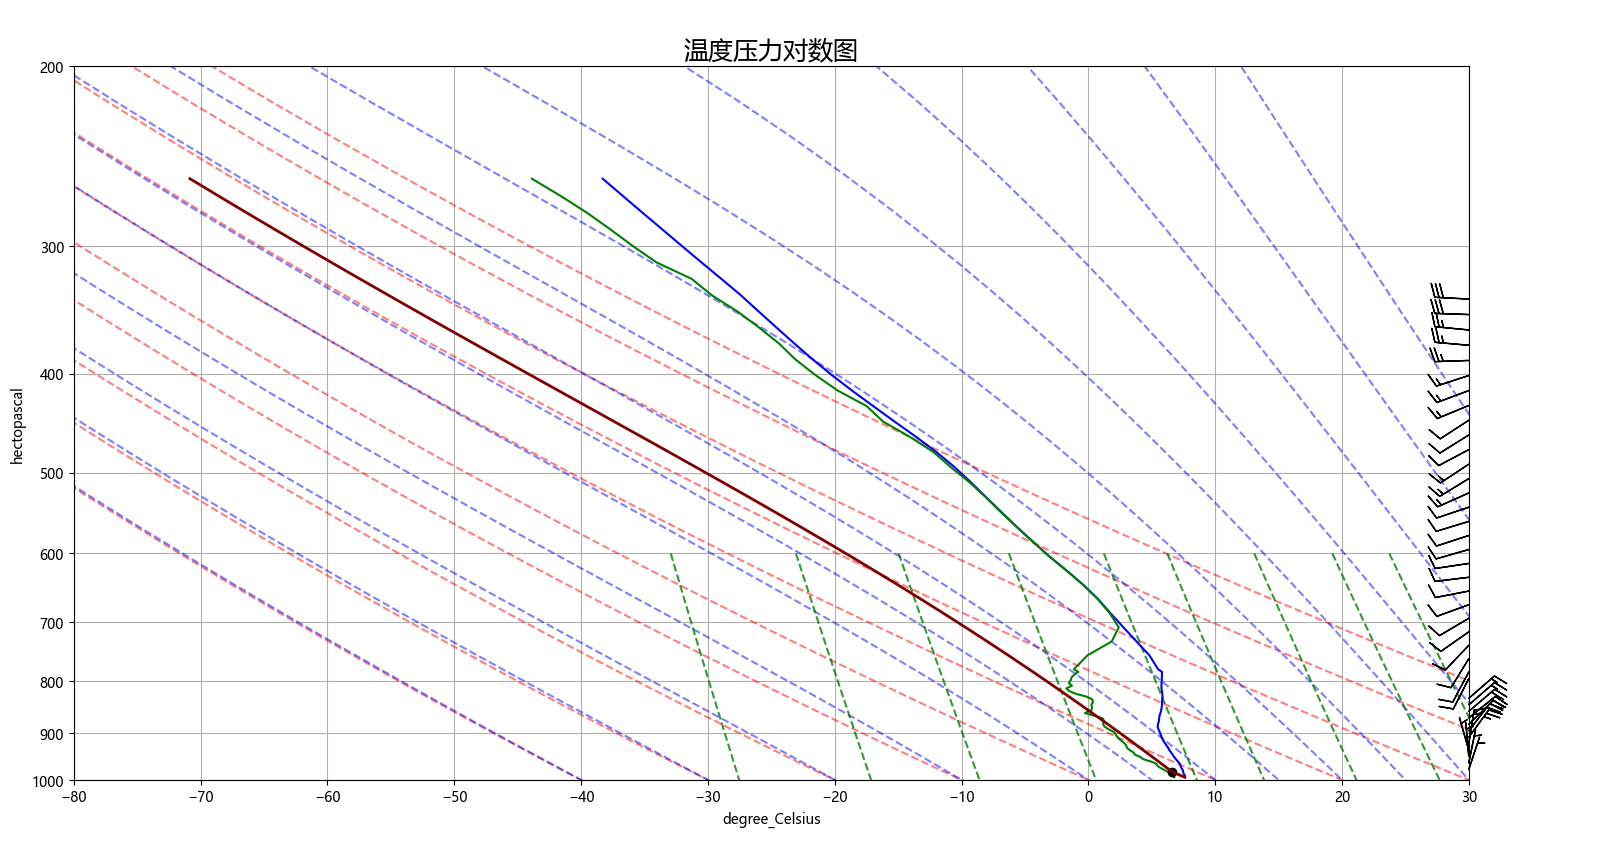

In [25]:
from metpy.plots import SkewT
# 设置绘图参数
fig = plt.figure(figsize=(18, 12))
skew = SkewT(fig, rotation=0)#注意 rotation 表示图像旋转，默认为 30度 ，旋转表示斜温图

skew.plot_dry_adiabats()
skew.plot_moist_adiabats()
skew.plot_mixing_lines()
skew.ax.set_xlim(-80, 30)
skew.ax.set_ylim(1000, 200)
skew.ax.set_title('温度压力对数图', fontsize=18)


# 微波辐射计的数据
p = show_data['PRS_HWC'].values * units.hPa
T = show_data['TEM'].values*units.degC
Td = show_data['DWP'].values*units.degC
# 风廓线仪器的数据
p2 = fkx_df['PRS_HWC'].values * units.hPa
u = fkx_df['U_Wind_Speed'].values * units.knots
v = fkx_df['V_Wind_Speed'].values * units.knots

# 绘制 温度层结曲线
skew.plot(p, T, 'blue')

# 绘制 露点层结曲线
skew.plot(p, Td, 'green')

# 绘制 LCL 抬升凝结高度
lcl_pressure, lcl_temperature = mpcalc.lcl(p[0], T[0], Td[0])
skew.plot(lcl_pressure, lcl_temperature, 'ko', markerfacecolor='black')

# 计算气块上升期的温度
prof = mpcalc.parcel_profile(p, T[0], Td[0]).to('degC')
# 绘制 状态曲线
skew.plot(p, prof, 'maroon', linewidth=2)

# 绘制 风羽
skew.plot_barbs(p2, u, v);

叠加风羽的 TLogP 图更能分析高空冷暖平流输送，对灾害性天气的预测有更大的作用。

TLogP 图也常常被称为 TLnP 图，在 气象 MICAPS 软件中又被称为 **温度压力对数图**。

颜色为 blue 的曲线表示不同气压高度下的大气温度廓线，即**温度层结曲线**；

颜色为 green  的曲线表示不同气压高度下 大气露点温度廓线，即**露点层结曲线**；

颜色为 maroon  的曲线表示虚拟气块上升的温度状态曲线，即**状态曲线**；

由于该日无强对流，因无法绘制 **CAPE （对流有效位能）** ；不过从图中我们可以发现 近地层 **露点层结曲线和温度层结曲线很接近**，说明该日**近地面相对湿度较高**，结合风羽看，**风力较小**，这样往往存在 **轻雾或大雾等天气**。

实况也是如此，该日能见度自 07 时不断走低，最小能见度 200 米发生在 08 时至 09 时之间。

当然有经验的气象预报员还可以从探空图中看出更多的信息，如果屏幕前的你是气象系统职工，可以上中国气象局远程培训网查找相应课程学习。